## collabotation overall score predictor

meeting number 13 predict

### 1. library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression
from catboost import CatBoostRegressor

### 2. data load

In [2]:
df = pd.read_csv('data\dataset_collaboration_with_survey_scores.csv')
df

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
0,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,0,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
1,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,1,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
2,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,2,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
3,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,3,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
4,3_0_SPEAKER_01,3,1,1,645,8731,1.633333,394.897959,1,0,...,0.009704,0.166808,0.083381,0.083428,0.000051,9.523587e-08,0.000000,0.000030,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,0,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
437,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,1,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
438,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,2,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
439,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,3,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0


In [3]:
# meeting_number 12 speaker05 delete
df_filtered = df[~((df['speaker_id'] == 5) | (df['next_speaker_id'] == 5))]
df_filtered

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
0,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,0,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
1,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,1,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
2,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,2,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
3,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,3,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
4,3_0_SPEAKER_01,3,1,1,645,8731,1.633333,394.897959,1,0,...,0.009704,0.166808,0.083381,0.083428,0.000051,9.523587e-08,0.000000,0.000030,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,0,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
437,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,1,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
438,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,2,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
439,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,3,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0


In [4]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 0 to 440
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              430 non-null    object 
 1   project                         430 non-null    int64  
 2   meeting_number                  430 non-null    int64  
 3   speaker_number                  430 non-null    int64  
 4   speech_frequency                430 non-null    int64  
 5   total_words                     430 non-null    int64  
 6   duration                        430 non-null    float64
 7   normalized_speech_frequency     430 non-null    float64
 8   speaker_id                      430 non-null    int64  
 9   next_speaker_id                 430 non-null    int64  
 10  count                           430 non-null    int64  
 11  network_density                 430 non-null    float64
 12  weighted_network_density        430 non-n

### 3. data split

In [5]:
df_filtered.columns

Index(['id', 'project', 'meeting_number', 'speaker_number', 'speech_frequency',
       'total_words', 'duration', 'normalized_speech_frequency', 'speaker_id',
       'next_speaker_id', 'count', 'network_density',
       'weighted_network_density', 'gini_coefficient',
       'interaction_equality_index', 'degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'eigenvector_centrality', 'pagerank',
       'overall_collaboration_score', 'individual_collaboration_score'],
      dtype='object')

In [6]:
# 중복 제거 및 필요한 특성과 타겟 변수 선택
df_unique = df_filtered.drop_duplicates(subset=['meeting_number', 'speaker_number'])
df_unique

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
0,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,0,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000e+00,2.907995e-06,-1.0,-1.0
4,3_0_SPEAKER_01,3,1,1,645,8731,1.633333,394.897959,1,0,...,0.009704,0.166808,0.083381,0.083428,0.000051,9.523587e-08,0.000000e+00,3.007661e-05,-1.0,-1.0
8,3_0_SPEAKER_02,3,1,2,345,8731,1.633333,211.224490,2,0,...,0.009704,0.039777,0.018944,0.020833,0.000026,9.381797e-07,0.000000e+00,8.511463e-06,-1.0,-1.0
12,3_0_SPEAKER_03,3,1,3,7719,8731,1.633333,4725.918367,3,0,...,0.009704,0.206396,0.104167,0.102230,0.000026,2.851330e-07,0.000000e+00,3.566443e-05,-1.0,-1.0
16,3_1_SPEAKER_00,3,2,0,2,7910,1.533333,1.304348,0,0,...,-0.506997,0.000082,0.000041,0.000041,0.000000,1.430560e-07,0.000000e+00,2.378949e-06,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,4_13_SPEAKER_00,4,14,0,799,10214,1.833333,435.818182,0,0,...,0.221733,0.019289,0.009892,0.009396,0.000002,8.821258e-07,1.805430e-06,1.189414e-06,NaN,-1.0
421,4_13_SPEAKER_01,4,14,1,439,10214,1.833333,239.454545,1,0,...,0.221733,0.001786,0.000850,0.000935,0.000010,6.953985e-07,1.386614e-07,4.613124e-07,NaN,-1.0
426,4_13_SPEAKER_02,4,14,2,585,10214,1.833333,319.090909,2,0,...,0.221733,0.009552,0.004578,0.004974,0.000000,8.582846e-07,8.299759e-07,7.617138e-07,NaN,-1.0
431,4_13_SPEAKER_03,4,14,3,7248,10214,1.833333,3953.454545,3,0,...,0.221733,0.124639,0.060821,0.063818,0.000000,1.828591e-07,9.009446e-06,6.049137e-06,NaN,-1.0


In [7]:
# 모든 특성을 사용
features = ['project', 'meeting_number', 'speaker_number', 'speech_frequency',
       'total_words', 'duration', 'normalized_speech_frequency', 'speaker_id',
       'next_speaker_id', 'count', 'network_density',
       'weighted_network_density', 'gini_coefficient',
       'interaction_equality_index', 'degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'eigenvector_centrality', 'pagerank','individual_collaboration_score']
target = 'overall_collaboration_score'

In [8]:
# 특성과 타겟 분리
X = df_unique[features]
y = df_unique[target]
X

,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,count,...,gini_coefficient,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,individual_collaboration_score
0,3,1,0,22,8731,1.633333,13.469388,0,0,0,...,0.518229,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000e+00,2.907995e-06,-1.0
4,3,1,1,645,8731,1.633333,394.897959,1,0,1,...,0.518229,0.009704,0.166808,0.083381,0.083428,0.000051,9.523587e-08,0.000000e+00,3.007661e-05,-1.0
8,3,1,2,345,8731,1.633333,211.224490,2,0,0,...,0.518229,0.009704,0.039777,0.018944,0.020833,0.000026,9.381797e-07,0.000000e+00,8.511463e-06,-1.0
12,3,1,3,7719,8731,1.633333,4725.918367,3,0,0,...,0.518229,0.009704,0.206396,0.104167,0.102230,0.000026,2.851330e-07,0.000000e+00,3.566443e-05,-1.0
16,3,2,0,2,7910,1.533333,1.304348,0,0,0,...,0.697020,-0.506997,0.000082,0.000041,0.000041,0.000000,1.430560e-07,0.000000e+00,2.378949e-06,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,4,14,0,799,10214,1.833333,435.818182,0,0,0,...,0.415748,0.221733,0.019289,0.009892,0.009396,0.000002,8.821258e-07,1.805430e-06,1.189414e-06,-1.0
421,4,14,1,439,10214,1.833333,239.454545,1,0,1,...,0.415748,0.221733,0.001786,0.000850,0.000935,0.000010,6.953985e-07,1.386614e-07,4.613124e-07,-1.0
426,4,14,2,585,10214,1.833333,319.090909,2,0,1,...,0.415748,0.221733,0.009552,0.004578,0.004974,0.000000,8.582846e-07,8.299759e-07,7.617138e-07,-1.0
431,4,14,3,7248,10214,1.833333,3953.454545,3,0,35,...,0.415748,0.221733,0.124639,0.060821,0.063818,0.000000,1.828591e-07,9.009446e-06,6.049137e-06,-1.0


In [9]:
# 데이터 인덱스 재설정
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

### 4. model

1. XGBoost

1.1 모든 feature 사용

In [10]:
# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = XGBRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)
    
    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
 
# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

🔹 Fold results: MSE: 1.2158, MAE: 0.8344, R2: 0.8891
🔹 Fold results: MSE: 0.2467, MAE: 0.2868, R2: 0.9859
🔹 Fold results: MSE: 0.8362, MAE: 0.6131, R2: 0.9006
🔹 Fold results: MSE: 0.4515, MAE: 0.4840, R2: 0.9605
🔹 Fold results: MSE: 0.2840, MAE: 0.3091, R2: 0.9726

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.6068 ± 0.3692
🔸 Mean MAE: 0.5055 ± 0.2033
🔸 Mean R2 Score: 0.9417 ± 0.0393

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 3.1895
🔸 Validation MAE: 1.4649
🔸 Validation R2 Score: -3.1968

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0        -0.999635               1               0
1        -0.998176               1               1
2        -0.999834               1               2
3        -1.000819               1               3
4        -0.998444               2               0
5        -0.999635               2               1
6         

1.2 선별된 feature 사용

project                           0.888526
meeting_number                    0.894357
speaker_number                    0.089171
speech_frequency                  0.175068
total_words                       0.875010
duration                          0.862187
normalized_speech_frequency      -0.065724
speaker_id                        0.089171
next_speaker_id                        NaN
count                             0.429826
network_density                   0.893884
weighted_network_density         -0.189523
gini_coefficient                 -0.478317
interaction_equality_index        0.452092
degree_centrality                -0.362379
indegree_centrality              -0.360721
outdegree_centrality             -0.363239
betweenness_centrality           -0.293993
closeness_centrality             -0.273539
eigenvector_centrality           -0.265955
pagerank                         -0.466175
individual_collaboration_score    0.963438
Name: overall_collaboration_score, dtype: float64


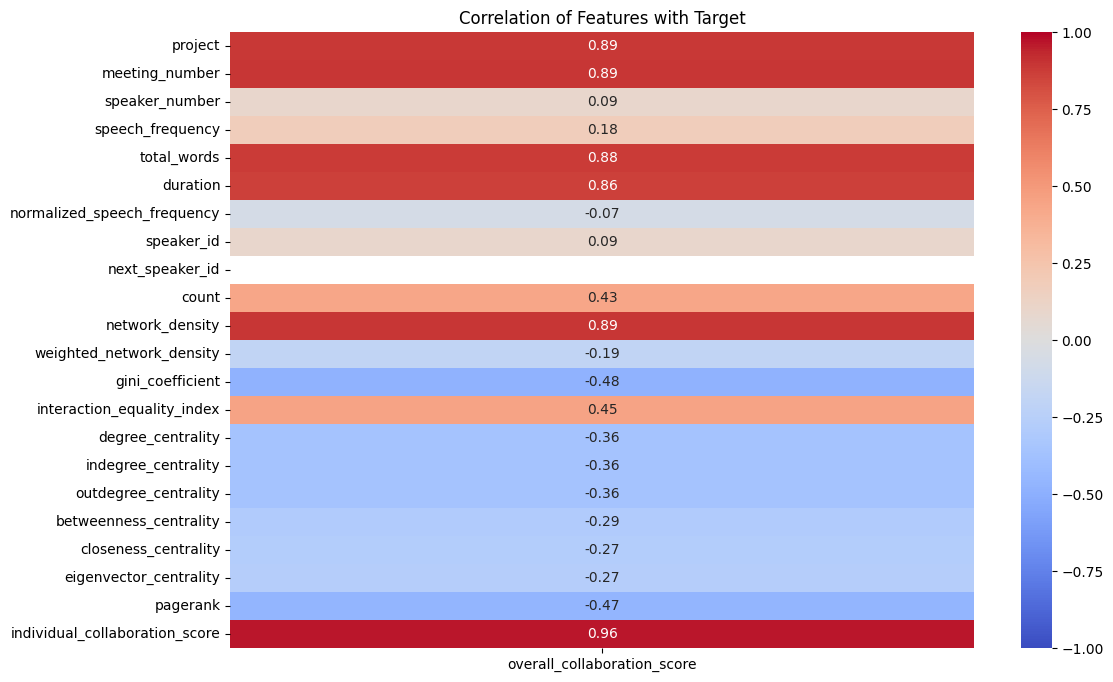

In [11]:
# 타겟과 모든 특성 간의 상관계수 계산
correlation_matrix = df_unique[features + [target]].corr()

# 타겟과의 상관계수만 추출
target_correlations = correlation_matrix[target].drop(target)

print(target_correlations)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(target_correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f')
plt.title('Correlation of Features with Target')
plt.show()

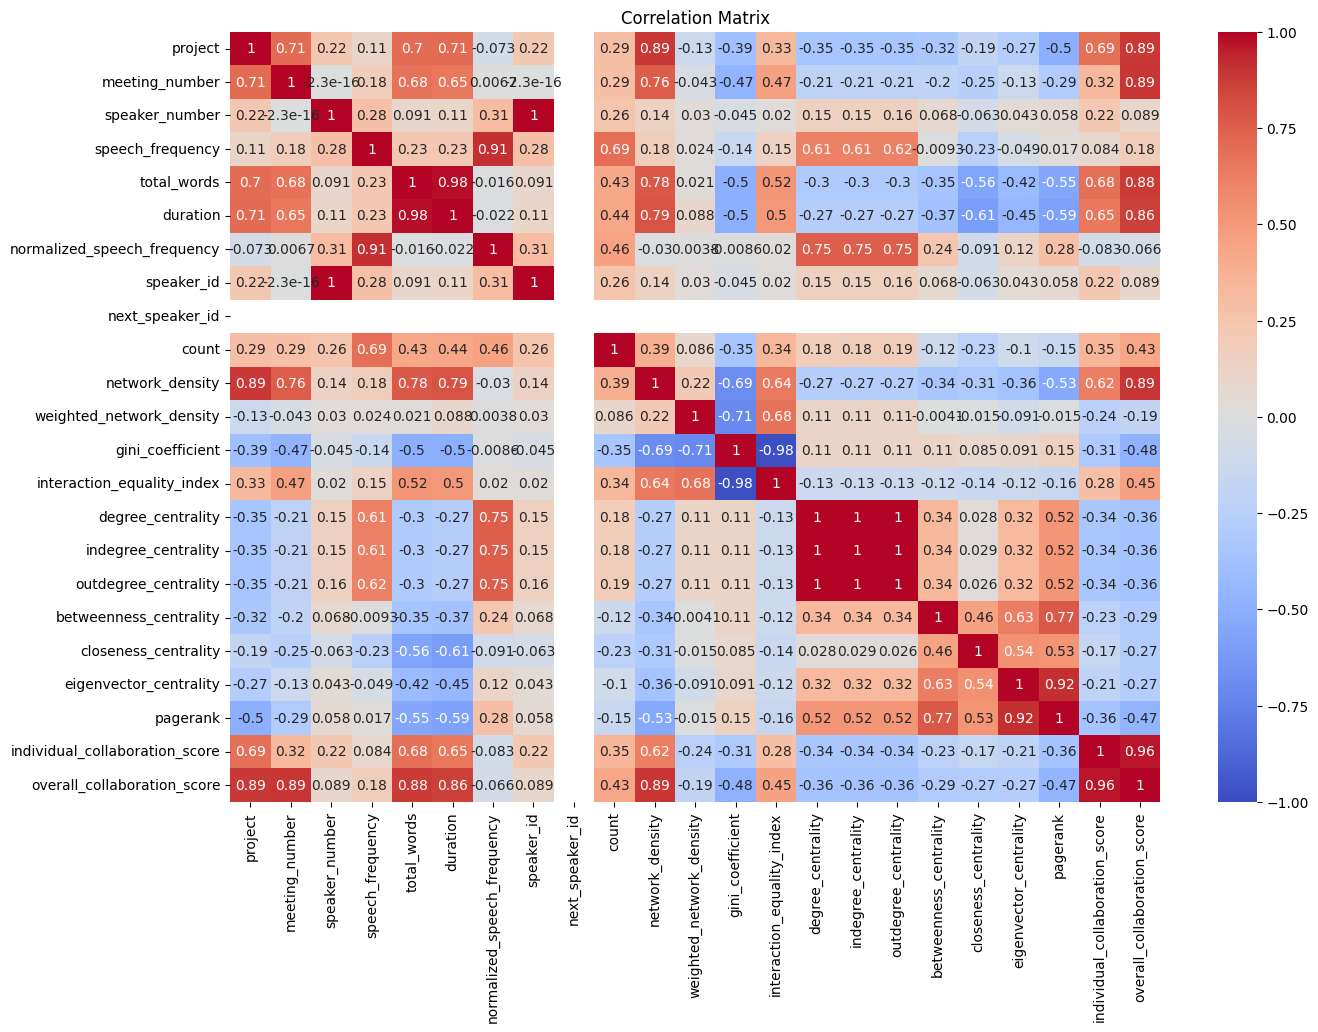

['meeting_number',
 'speaker_number',
 'speech_frequency',
 'normalized_speech_frequency',
 'speaker_id',
 'next_speaker_id',
 'count',
 'weighted_network_density',
 'gini_coefficient',
 'interaction_equality_index',
 'degree_centrality',
 'indegree_centrality',
 'outdegree_centrality',
 'betweenness_centrality',
 'closeness_centrality',
 'eigenvector_centrality',
 'pagerank']

In [12]:
# 상관 계수 계산 및 시각화
correlation_matrix = df_unique[features + [target]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 타겟과의 상관계수가 높은 피처 제거
high_corr_threshold = 0.8
high_corr_features = correlation_matrix[target][abs(correlation_matrix[target]) >= high_corr_threshold].index.tolist()
high_corr_features.remove(target)  # 타겟 변수는 제거 대상에서 제외

# 상관계수가 높은 피처 중에서 'meeting_number'와 'speaker_number'를 제외한 피처 리스트
selected_features = [feature for feature in features if feature not in high_corr_features or feature in ['meeting_number', 'speaker_number']]
selected_features


In [13]:
# 데이터 분할 (train/validation/test)
train_mask = df_unique['meeting_number'] <= 10
val_mask = (df_unique['meeting_number'] > 10) & (df_unique['meeting_number'] <= 12)
test_mask = df_unique['meeting_number'] == 13

X_train_val = df_unique[train_mask][selected_features]
y_train_val = df_unique[train_mask][target]
X_val = df_unique[val_mask][selected_features]
y_val = df_unique[val_mask][target]
X_test = df_unique[test_mask][selected_features]
y_test = df_unique[test_mask][target]

# 중요한 피처 선택
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)

# 선택된 피처의 이름
selected_feature_names = X_train_val.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

# 선택된 피처로 Validation 데이터 준비
X_val_selected = X_val[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# 모델 학습 및 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])
mse_values = []

for train_index, val_index in kf.split(X_train_val_selected):
    X_train, X_val_split = X_train_val_selected[train_index], X_train_val_selected[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    model = XGBRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred_val_split = model.predict(X_val_split_scaled)
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val_selected)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

Selected features: Index(['meeting_number', 'count', 'gini_coefficient',
       'interaction_equality_index', 'degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'betweenness_centrality',
       'eigenvector_centrality', 'pagerank'],
      dtype='object')
🔹 Fold results: MSE: 1.7180, MAE: 0.9184, R2: 0.8433
🔹 Fold results: MSE: 0.4475, MAE: 0.4864, R2: 0.9743
🔹 Fold results: MSE: 2.1205, MAE: 0.8608, R2: 0.7479
🔹 Fold results: MSE: 1.8239, MAE: 0.8554, R2: 0.8406
🔹 Fold results: MSE: 1.4583, MAE: 0.6869, R2: 0.8592

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 1.5137 ± 0.5738
🔸 Mean MAE: 0.6335 ± 0.2225
🔸 Mean R2 Score: 0.8974 ± 0.0731

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 1.7329
🔸 Validation MAE: 1.0505
🔸 Validation R2 Score: -1.2801

----------------------------------------

📝 Predictions:
    predicted_score  meeting_number  speaker_number
0         -0.957091               1 

c:\Users\mkflo\.conda\envs\programmers\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1.3 최적의 파라미터 사용

In [14]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9 ],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0]
}

# GridSearchCV 설정
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# 데이터 스케일링
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_val_scaled = scaler.transform(X_val)

# 그리드 서치 수행
grid_search.fit(X_train_val_scaled, y_train_val)

# 최적 하이퍼파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_}")

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
Best parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}
Best CV MSE: 6.8031030560113


In [17]:
# 데이터 분할 (train/validation/test)
train_mask = df_unique['meeting_number'] <= 10
val_mask = (df_unique['meeting_number'] > 10) & (df_unique['meeting_number'] <= 12)
test_mask = df_unique['meeting_number'] == 13

X_train_val = df_unique[train_mask][selected_features]
y_train_val = df_unique[train_mask][target]
X_val = df_unique[val_mask][selected_features]
y_val = df_unique[val_mask][target]
X_test = df_unique[test_mask][selected_features]
y_test = df_unique[test_mask][target]

# 중요한 피처 선택
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)

# 선택된 피처의 이름
selected_feature_names = X_train_val.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

# 선택된 피처로 Validation 데이터 준비
X_val_selected = X_val[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# 모델 학습 및 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# 최적의 하이퍼파라미터 설정
best_params = {
    'colsample_bytree': 0.4, 
    'learning_rate': 0.1, 
    'max_depth': 5, 
    'n_estimators': 300, 
    'subsample': 0.6}

for train_index, val_index in kf.split(X_train_val_selected):
    X_train, X_val_split = X_train_val_selected[train_index], X_train_val_selected[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    model = XGBRegressor(**best_params)
    model.fit(X_train_scaled, y_train)

    y_pred_val_split = model.predict(X_val_split_scaled)
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val_selected)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)


# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []


# 최적의 하이퍼파라미터 설정
best_params = {
    'colsample_bytree': 0.4, 
    'learning_rate': 0.1, 
    'max_depth': 5, 
    'n_estimators': 300, 
    'subsample': 0.6
    }

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# MSE 값을 저장할 리스트
mse_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = XGBRegressor(**best_params)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)

    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

Selected features: Index(['meeting_number', 'count', 'gini_coefficient',
       'interaction_equality_index', 'degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'betweenness_centrality',
       'eigenvector_centrality', 'pagerank'],
      dtype='object')
🔹 Fold results: MSE: 2.1082, MAE: 1.1762, R2: 0.8076
🔹 Fold results: MSE: 0.6237, MAE: 0.5614, R2: 0.9642
🔹 Fold results: MSE: 0.7334, MAE: 0.5530, R2: 0.9128
🔹 Fold results: MSE: 1.0194, MAE: 0.6970, R2: 0.9109
🔹 Fold results: MSE: 0.2622, MAE: 0.4079, R2: 0.9747

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.8684 ± 0.5238
🔸 Mean MAE: 0.6118 ± 0.2297
🔸 Mean R2 Score: 0.9189 ± 0.0513

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 2.5187
🔸 Validation MAE: 1.3181
🔸 Validation R2 Score: -2.3141

----------------------------------------

📝 Predictions:
    predicted_score  meeting_number  speaker_number
0           -0.5838               1 

c:\Users\mkflo\.conda\envs\programmers\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


🔹 Fold results: MSE: 1.3351, MAE: 0.7832, R2: 0.8782
🔹 Fold results: MSE: 0.2162, MAE: 0.2899, R2: 0.9876
🔹 Fold results: MSE: 0.9968, MAE: 0.5491, R2: 0.8815
🔹 Fold results: MSE: 0.6002, MAE: 0.4814, R2: 0.9475
🔹 Fold results: MSE: 0.7884, MAE: 0.6187, R2: 0.9239

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.7874 ± 0.3755
🔸 Mean MAE: 0.5445 ± 0.1621
🔸 Mean R2 Score: 0.9237 ± 0.0412

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 3.2776
🔸 Validation MAE: 1.4804
🔸 Validation R2 Score: -3.3126

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0        -0.901898               1               0
1        -0.972173               1               1
2        -1.036934               1               2
3        -0.878231               1               3
4        -0.986794               2               0
5        -0.936673               2               1
6        -

In [18]:
# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []


# 최적의 하이퍼파라미터 설정
best_params = {
    'colsample_bytree': 0.4, 
    'learning_rate': 0.1, 
    'max_depth': 5, 
    'n_estimators': 300, 
    'subsample': 0.6
    }

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# MSE 값을 저장할 리스트
mse_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = XGBRegressor(**best_params)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)

    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

🔹 Fold results: MSE: 1.3351, MAE: 0.7832, R2: 0.8782
🔹 Fold results: MSE: 0.2162, MAE: 0.2899, R2: 0.9876
🔹 Fold results: MSE: 0.9968, MAE: 0.5491, R2: 0.8815
🔹 Fold results: MSE: 0.6002, MAE: 0.4814, R2: 0.9475
🔹 Fold results: MSE: 0.7884, MAE: 0.6187, R2: 0.9239

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.7874 ± 0.3755
🔸 Mean MAE: 0.5445 ± 0.1621
🔸 Mean R2 Score: 0.9237 ± 0.0412

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 3.2776
🔸 Validation MAE: 1.4804
🔸 Validation R2 Score: -3.3126

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0        -0.901898               1               0
1        -0.972173               1               1
2        -1.036934               1               2
3        -0.878231               1               3
4        -0.986794               2               0
5        -0.936673               2               1
6        -

2) Catboost

2.1 모든 feature 사용

In [19]:
# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = CatBoostRegressor(random_state=42, verbose=0)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)
    
    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    
# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

🔹 Fold results: MSE: 1.7975, MAE: 1.0698, R2: 0.8360
🔹 Fold results: MSE: 0.3908, MAE: 0.5531, R2: 0.9776
🔹 Fold results: MSE: 0.6650, MAE: 0.4569, R2: 0.9209
🔹 Fold results: MSE: 0.2791, MAE: 0.4636, R2: 0.9756
🔹 Fold results: MSE: 1.0181, MAE: 0.7923, R2: 0.9017

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.8301 ± 0.5468
🔸 Mean MAE: 0.6671 ± 0.2351
🔸 Mean R2 Score: 0.9224 ± 0.0525

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 3.4308
🔸 Validation MAE: 1.7181
🔸 Validation R2 Score: -3.5142

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0        -0.769406               1               0
1        -0.665612               1               1
2        -0.686462               1               2
3        -0.746109               1               3
4        -0.876383               2               0
5        -0.909447               2               1
6        -

2.2 선택된 feature 사용

In [ ]:
# 데이터 분할 (train/validation/test)
train_mask = df_unique['meeting_number'] <= 10
val_mask = (df_unique['meeting_number'] > 10) & (df_unique['meeting_number'] <= 12)
test_mask = df_unique['meeting_number'] == 13

X_train_val = df_unique[train_mask][selected_features]
y_train_val = df_unique[train_mask][target]
X_val = df_unique[val_mask][selected_features]
y_val = df_unique[val_mask][target]
X_test = df_unique[test_mask][selected_features]
y_test = df_unique[test_mask][target]

# 중요한 피처 선택
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)

# 선택된 피처의 이름
selected_feature_names = X_train_val.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

# 선택된 피처로 Validation 데이터 준비
X_val_selected = X_val[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# 모델 학습 및 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])
mse_values = []

for train_index, val_index in kf.split(X_train_val_selected):
    X_train, X_val_split = X_train_val_selected[train_index], X_train_val_selected[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    model = CatBoostRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred_val_split = model.predict(X_val_split_scaled)
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val_selected)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

2.3 최적의 파라미터 

In [21]:
# CatBoost 모델 정의
catboost = CatBoostRegressor(iterations=1000,  # 반복 횟수
                             depth=6,         # 트리 깊이
                             learning_rate=0.1,  # 학습률
                             loss_function='RMSE',  # 손실 함수
                             verbose=100)     # 학습 과정 출력 (100 반복마다)

# 탐색할 파라미터 그리드
param_grid = {
    'iterations': [500, 1000, 1500, 2000],  # 반복 횟수
    'depth': [4, 6, 8, 10],               # 트리 깊이
    'learning_rate': [0.01, 0.1, 0.2, 0.3]  # 학습률
}

# GridSearchCV를 사용하여 최적의 파라미터 탐색
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0:	learn: 3.5986454	total: 2.43ms	remaining: 1.21s
100:	learn: 1.9923817	total: 178ms	remaining: 705ms
200:	learn: 1.1205385	total: 310ms	remaining: 461ms
300:	learn: 0.6889332	total: 403ms	remaining: 267ms
400:	learn: 0.4685670	total: 471ms	remaining: 116ms
499:	learn: 0.3333157	total: 534ms	remaining: 0us
[CV] END ........depth=4, iterations=500, learning_rate=0.01; total time=   0.6s
0:	learn: 3.4699400	total: 665us	remaining: 332ms
100:	learn: 1.9666782	total: 108ms	remaining: 426ms
200:	learn: 1.1663399	total: 197ms	remaining: 293ms
300:	learn: 0.7385082	total: 260ms	remaining: 172ms
400:	learn: 0.5017656	total: 325ms	remaining: 80.3ms
499:	learn: 0.3500943	total: 394ms	remaining: 0us
[CV] END ........depth=4, iterations=500, learning_rate=0.01; total time=   0.4s
0:	learn: 3.4677172	total: 797us	remaining: 398ms
100:	learn: 1.9821507	total: 84.4ms	remaining: 334ms
200:	learn: 1.1949191	total: 160ms	remaining: 238ms
300

In [23]:
# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []


# 최적의 하이퍼파라미터 설정
best_params = {'depth': 4, 'iterations': 1000, 'learning_rate': 0.3}

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# MSE 값을 저장할 리스트
mse_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = CatBoostRegressor(**best_params, verbose=False)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)

    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']
 
print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

🔹 Fold results: MSE: 1.8262, MAE: 1.0818, R2: 0.8334
🔹 Fold results: MSE: 0.2303, MAE: 0.3537, R2: 0.9868
🔹 Fold results: MSE: 0.4423, MAE: 0.4098, R2: 0.9474
🔹 Fold results: MSE: 0.4138, MAE: 0.4893, R2: 0.9638
🔹 Fold results: MSE: 0.7231, MAE: 0.6109, R2: 0.9302

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.7272 ± 0.5717
🔸 Mean MAE: 0.5891 ± 0.2611
🔸 Mean R2 Score: 0.9323 ± 0.0529

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 3.6558
🔸 Validation MAE: 1.6339
🔸 Validation R2 Score: -3.8103

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0        -0.977385               1               0
1        -0.173648               1               1
2         -0.84802               1               2
3        -0.822721               1               3
4        -1.003922               2               0
5        -1.004775               2               1
6        -

In [24]:
# 데이터 분할 (train/validation/test)
train_mask = df_unique['meeting_number'] <= 10
val_mask = (df_unique['meeting_number'] > 10) & (df_unique['meeting_number'] <= 12)
test_mask = df_unique['meeting_number'] == 13

X_train_val = df_unique[train_mask][selected_features]
y_train_val = df_unique[train_mask][target]
X_val = df_unique[val_mask][selected_features]
y_val = df_unique[val_mask][target]
X_test = df_unique[test_mask][selected_features]
y_test = df_unique[test_mask][target]

# 중요한 피처 선택
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)

# 선택된 피처의 이름
selected_feature_names = X_train_val.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

# 선택된 피처로 Validation 데이터 준비
X_val_selected = X_val[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# 모델 학습 및 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])
mse_values = []

# 최적의 하이퍼파라미터 설정
best_params = {'depth': 4, 'iterations': 1000, 'learning_rate': 0.3}

for train_index, val_index in kf.split(X_train_val_selected):
    X_train, X_val_split = X_train_val_selected[train_index], X_train_val_selected[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    model = CatBoostRegressor(**best_params, verbose=False)
    model.fit(X_train_scaled, y_train)

    y_pred_val_split = model.predict(X_val_split_scaled)
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val_selected)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

Selected features: Index(['meeting_number', 'count', 'gini_coefficient',
       'interaction_equality_index', 'degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'betweenness_centrality',
       'eigenvector_centrality', 'pagerank'],
      dtype='object')
🔹 Fold results: MSE: 2.6812, MAE: 1.3266, R2: 0.7554
🔹 Fold results: MSE: 0.7793, MAE: 0.6168, R2: 0.9553
🔹 Fold results: MSE: 0.8408, MAE: 0.6201, R2: 0.9000
🔹 Fold results: MSE: 0.7702, MAE: 0.7042, R2: 0.9327
🔹 Fold results: MSE: 0.6686, MAE: 0.6152, R2: 0.9355

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 1.1480 ± 0.7685
🔸 Mean MAE: 0.6828 ± 0.2850
🔸 Mean R2 Score: 0.9140 ± 0.0660

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 2.9782
🔸 Validation MAE: 1.4981
🔸 Validation R2 Score: -2.9187

----------------------------------------

📝 Predictions:
    predicted_score  meeting_number  speaker_number
0         -1.047807               1 

c:\Users\mkflo\.conda\envs\programmers\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
